In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Print columns and their types for Station
print("Columns and types in 'station' table:")
for column in Station.__table__.columns:
    print(f"{column.name}: {column.type}")

# Print columns and their types for Measurement
print("\nColumns and types in 'measurement' table:")
for column in Measurement.__table__.columns:
    print(f"{column.name}: {column.type}")

Columns and types in 'station' table:
id: INTEGER
station: TEXT
name: TEXT
latitude: FLOAT
longitude: FLOAT
elevation: FLOAT

Columns and types in 'measurement' table:
id: INTEGER
station: TEXT
date: TEXT
prcp: FLOAT
tobs: FLOAT


In [43]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).distinct().first()
most_recent_date

('2017-08-23',)

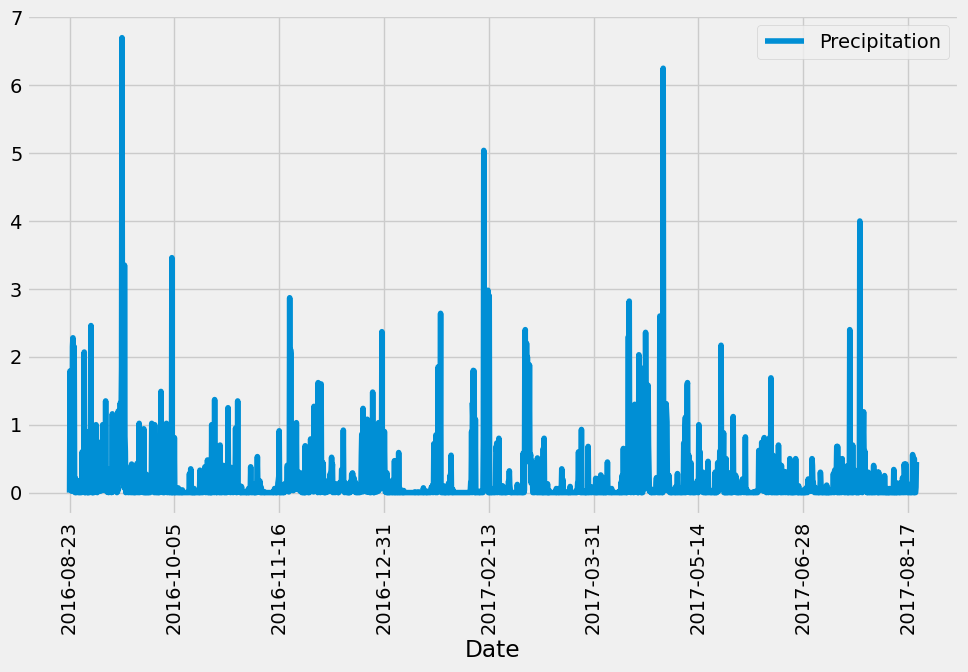

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).distinct().first()
most_recent_date

# Convert to datetime to use timedelta function to get the  date 1 year ago
most_recent_date = datetime.strptime(most_recent_date[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
twelve_months_ago = most_recent_date - timedelta(days=365)

# Convert back to strings
most_recent_date = most_recent_date.strftime("%Y-%m-%d")
twelve_months_ago = twelve_months_ago.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
last_yr_precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_months_ago)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.read_sql(last_yr_precip_data.statement, session.bind)
precip_data_df.rename(columns={'date' : 'Date', 'prcp' : 'Precipitation'}, inplace=True)


# Sort the dataframe by date and drop the NaN values
precip_data_df = precip_data_df.sort_values(by='Date').reset_index(drop=True)
precip_data_df = precip_data_df.dropna()


# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(x='Date',y='Precipitation', figsize=(10,6),legend=True)

# Format the graph
plt.tight_layout()
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.show()





In [91]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

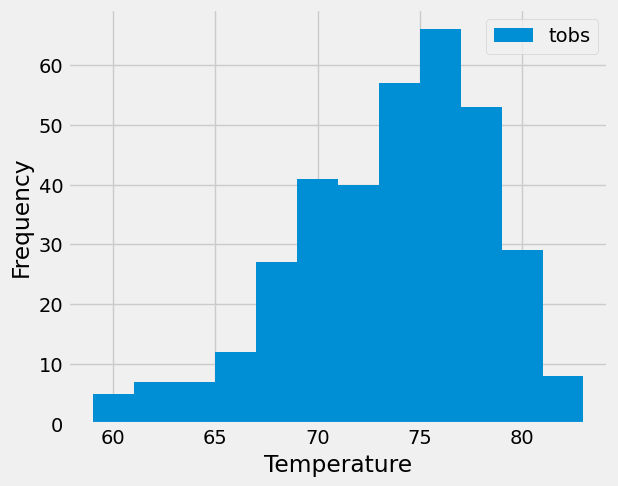

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()